___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Support Vector Machines Project 

Welcome to your Support Vector Machine Project! Just follow along with the notebook and instructions below. We will be analyzing the famous iris data set!

## The Data
For this series of lectures, we will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Here's a picture of the three different Iris types:

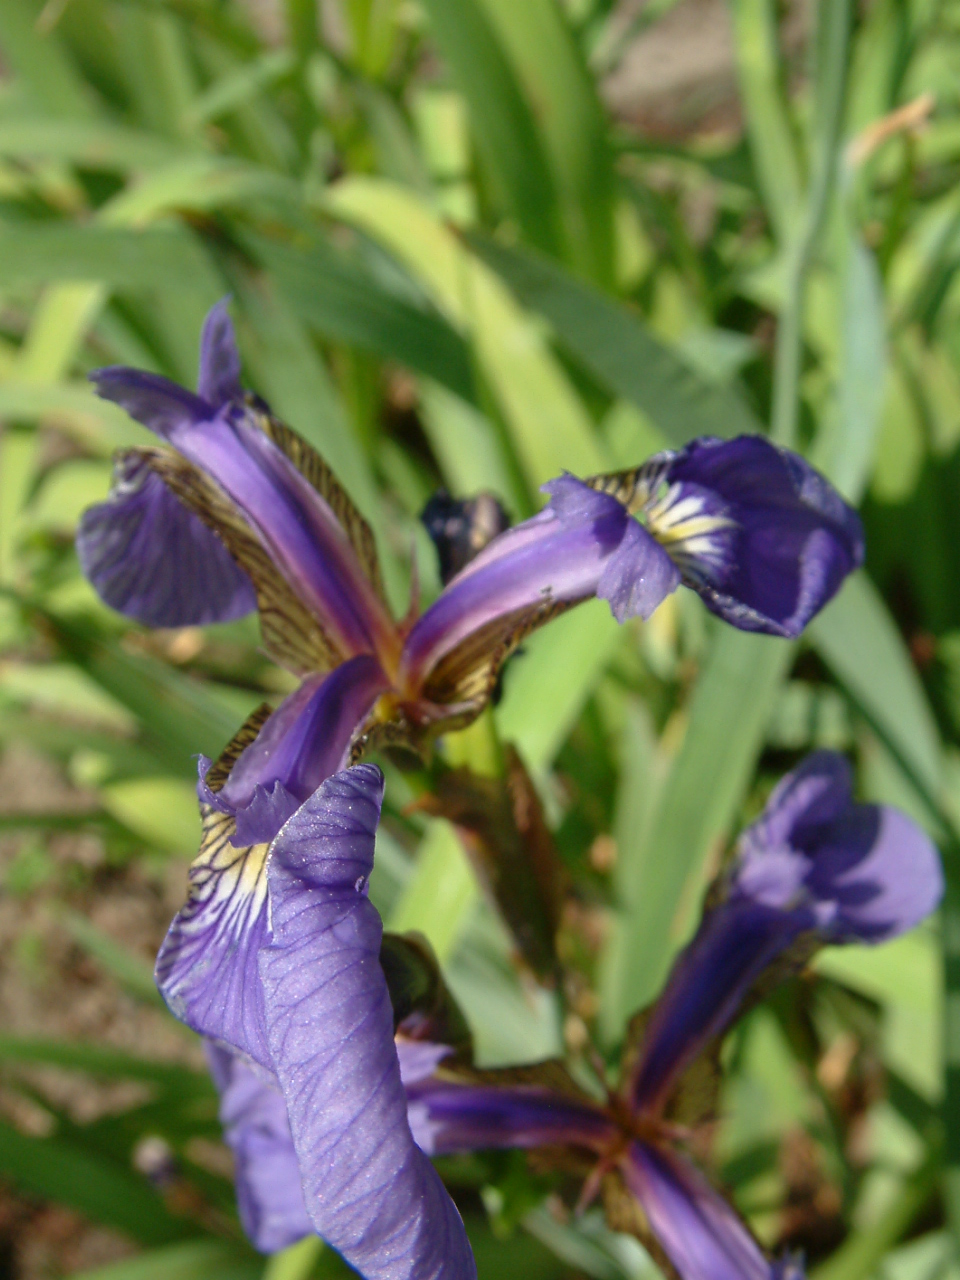

In [1]:
# The Iris Setosa
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'
Image(url,width=300, height=300)

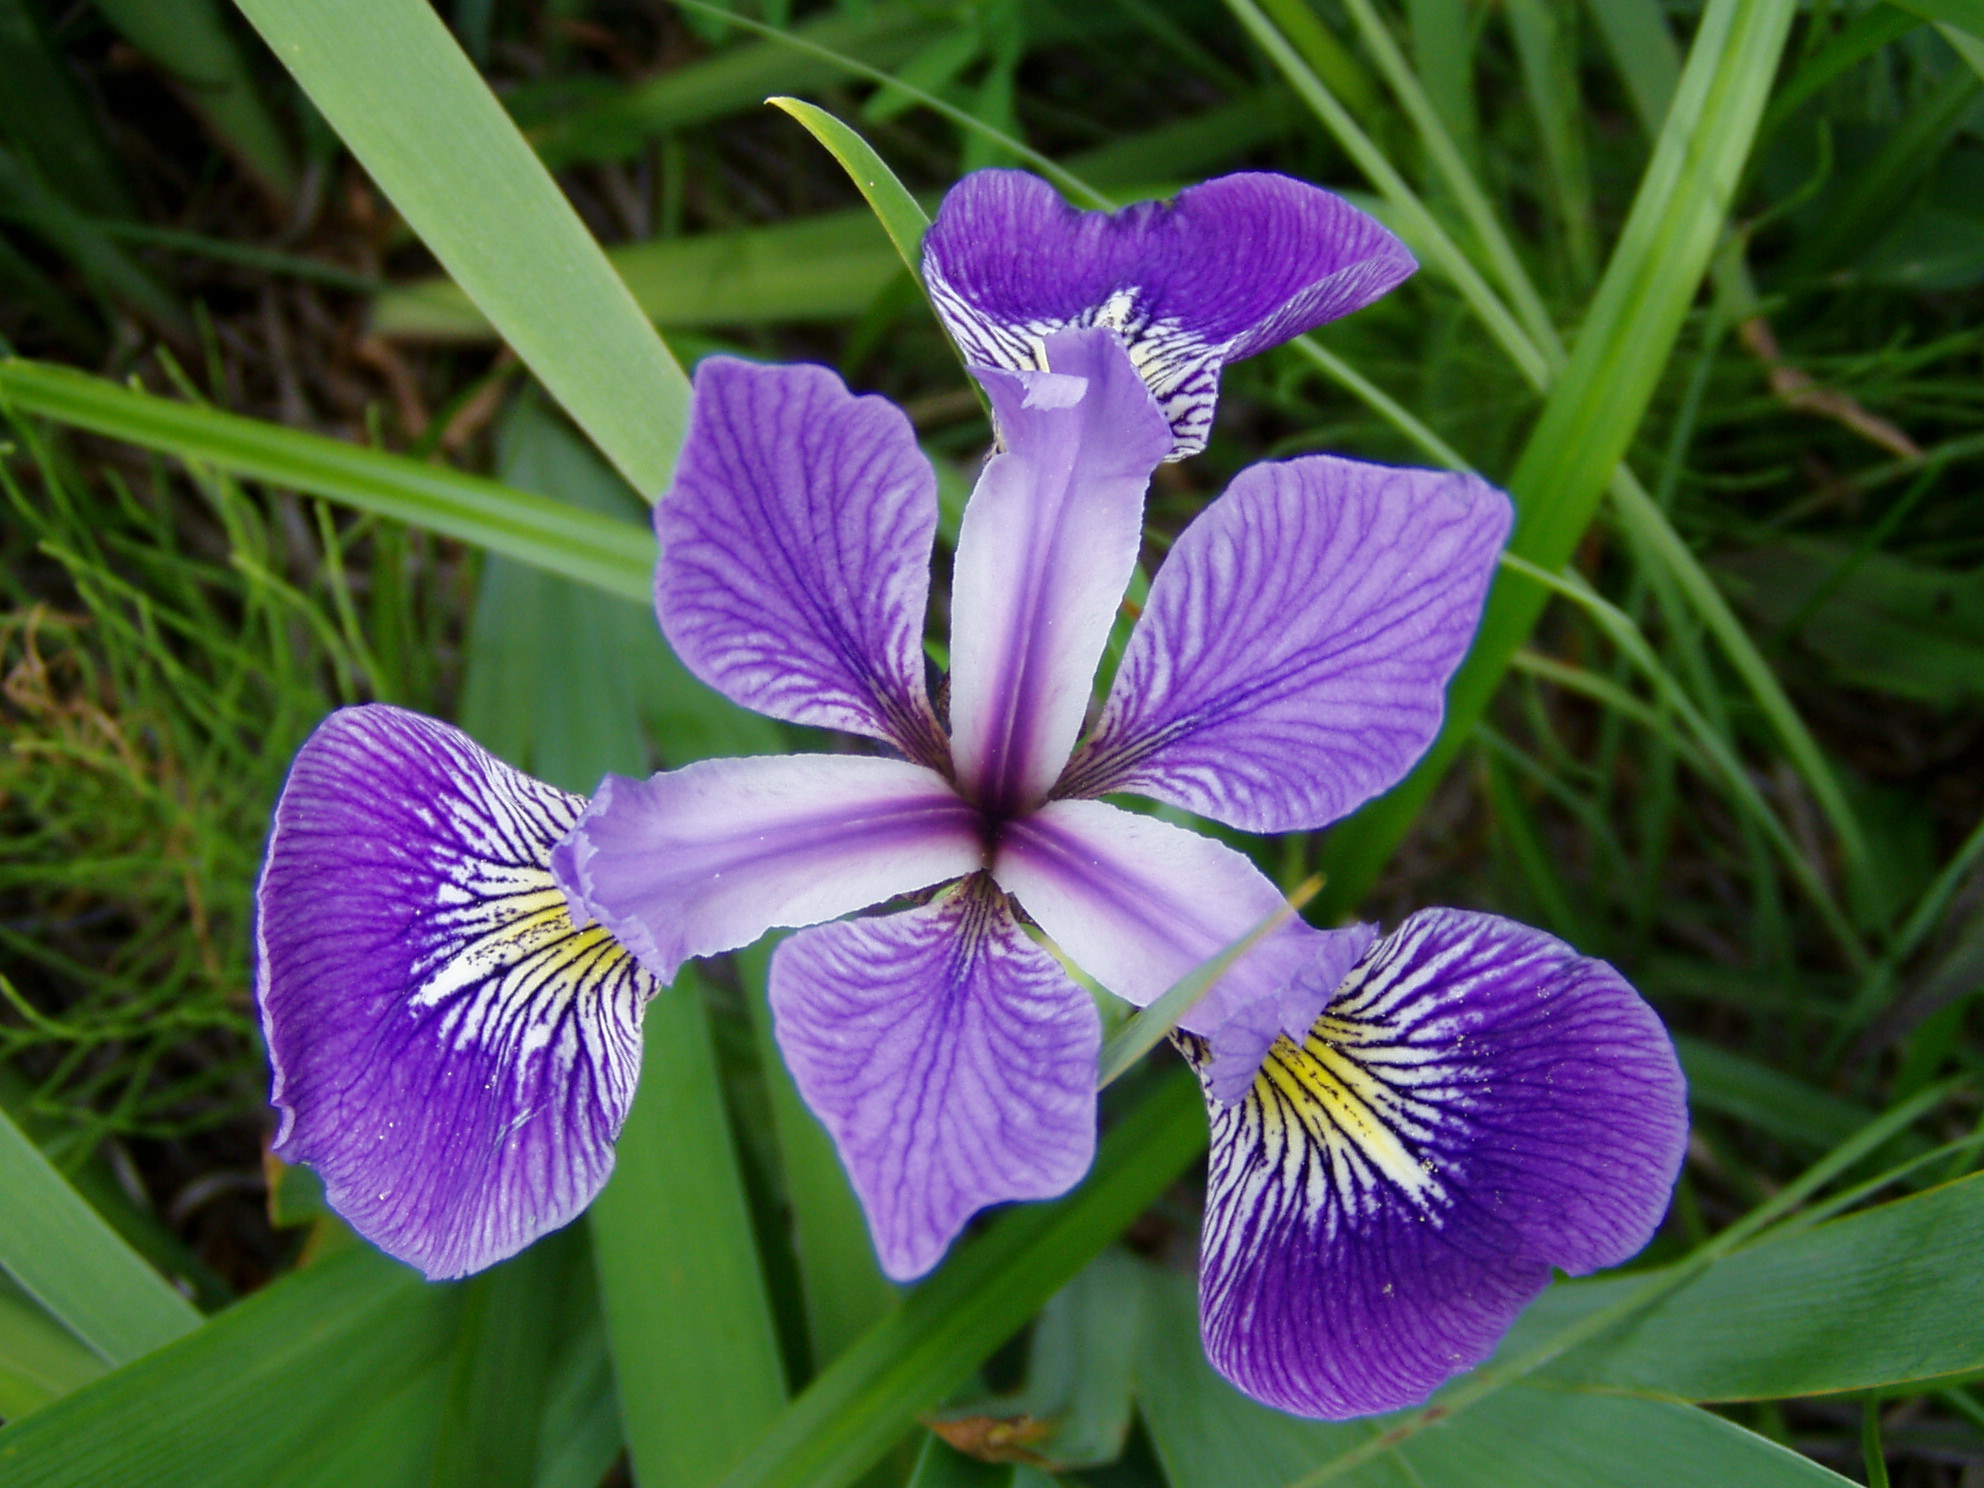

In [2]:
# The Iris Versicolor
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg'
Image(url,width=300, height=300)

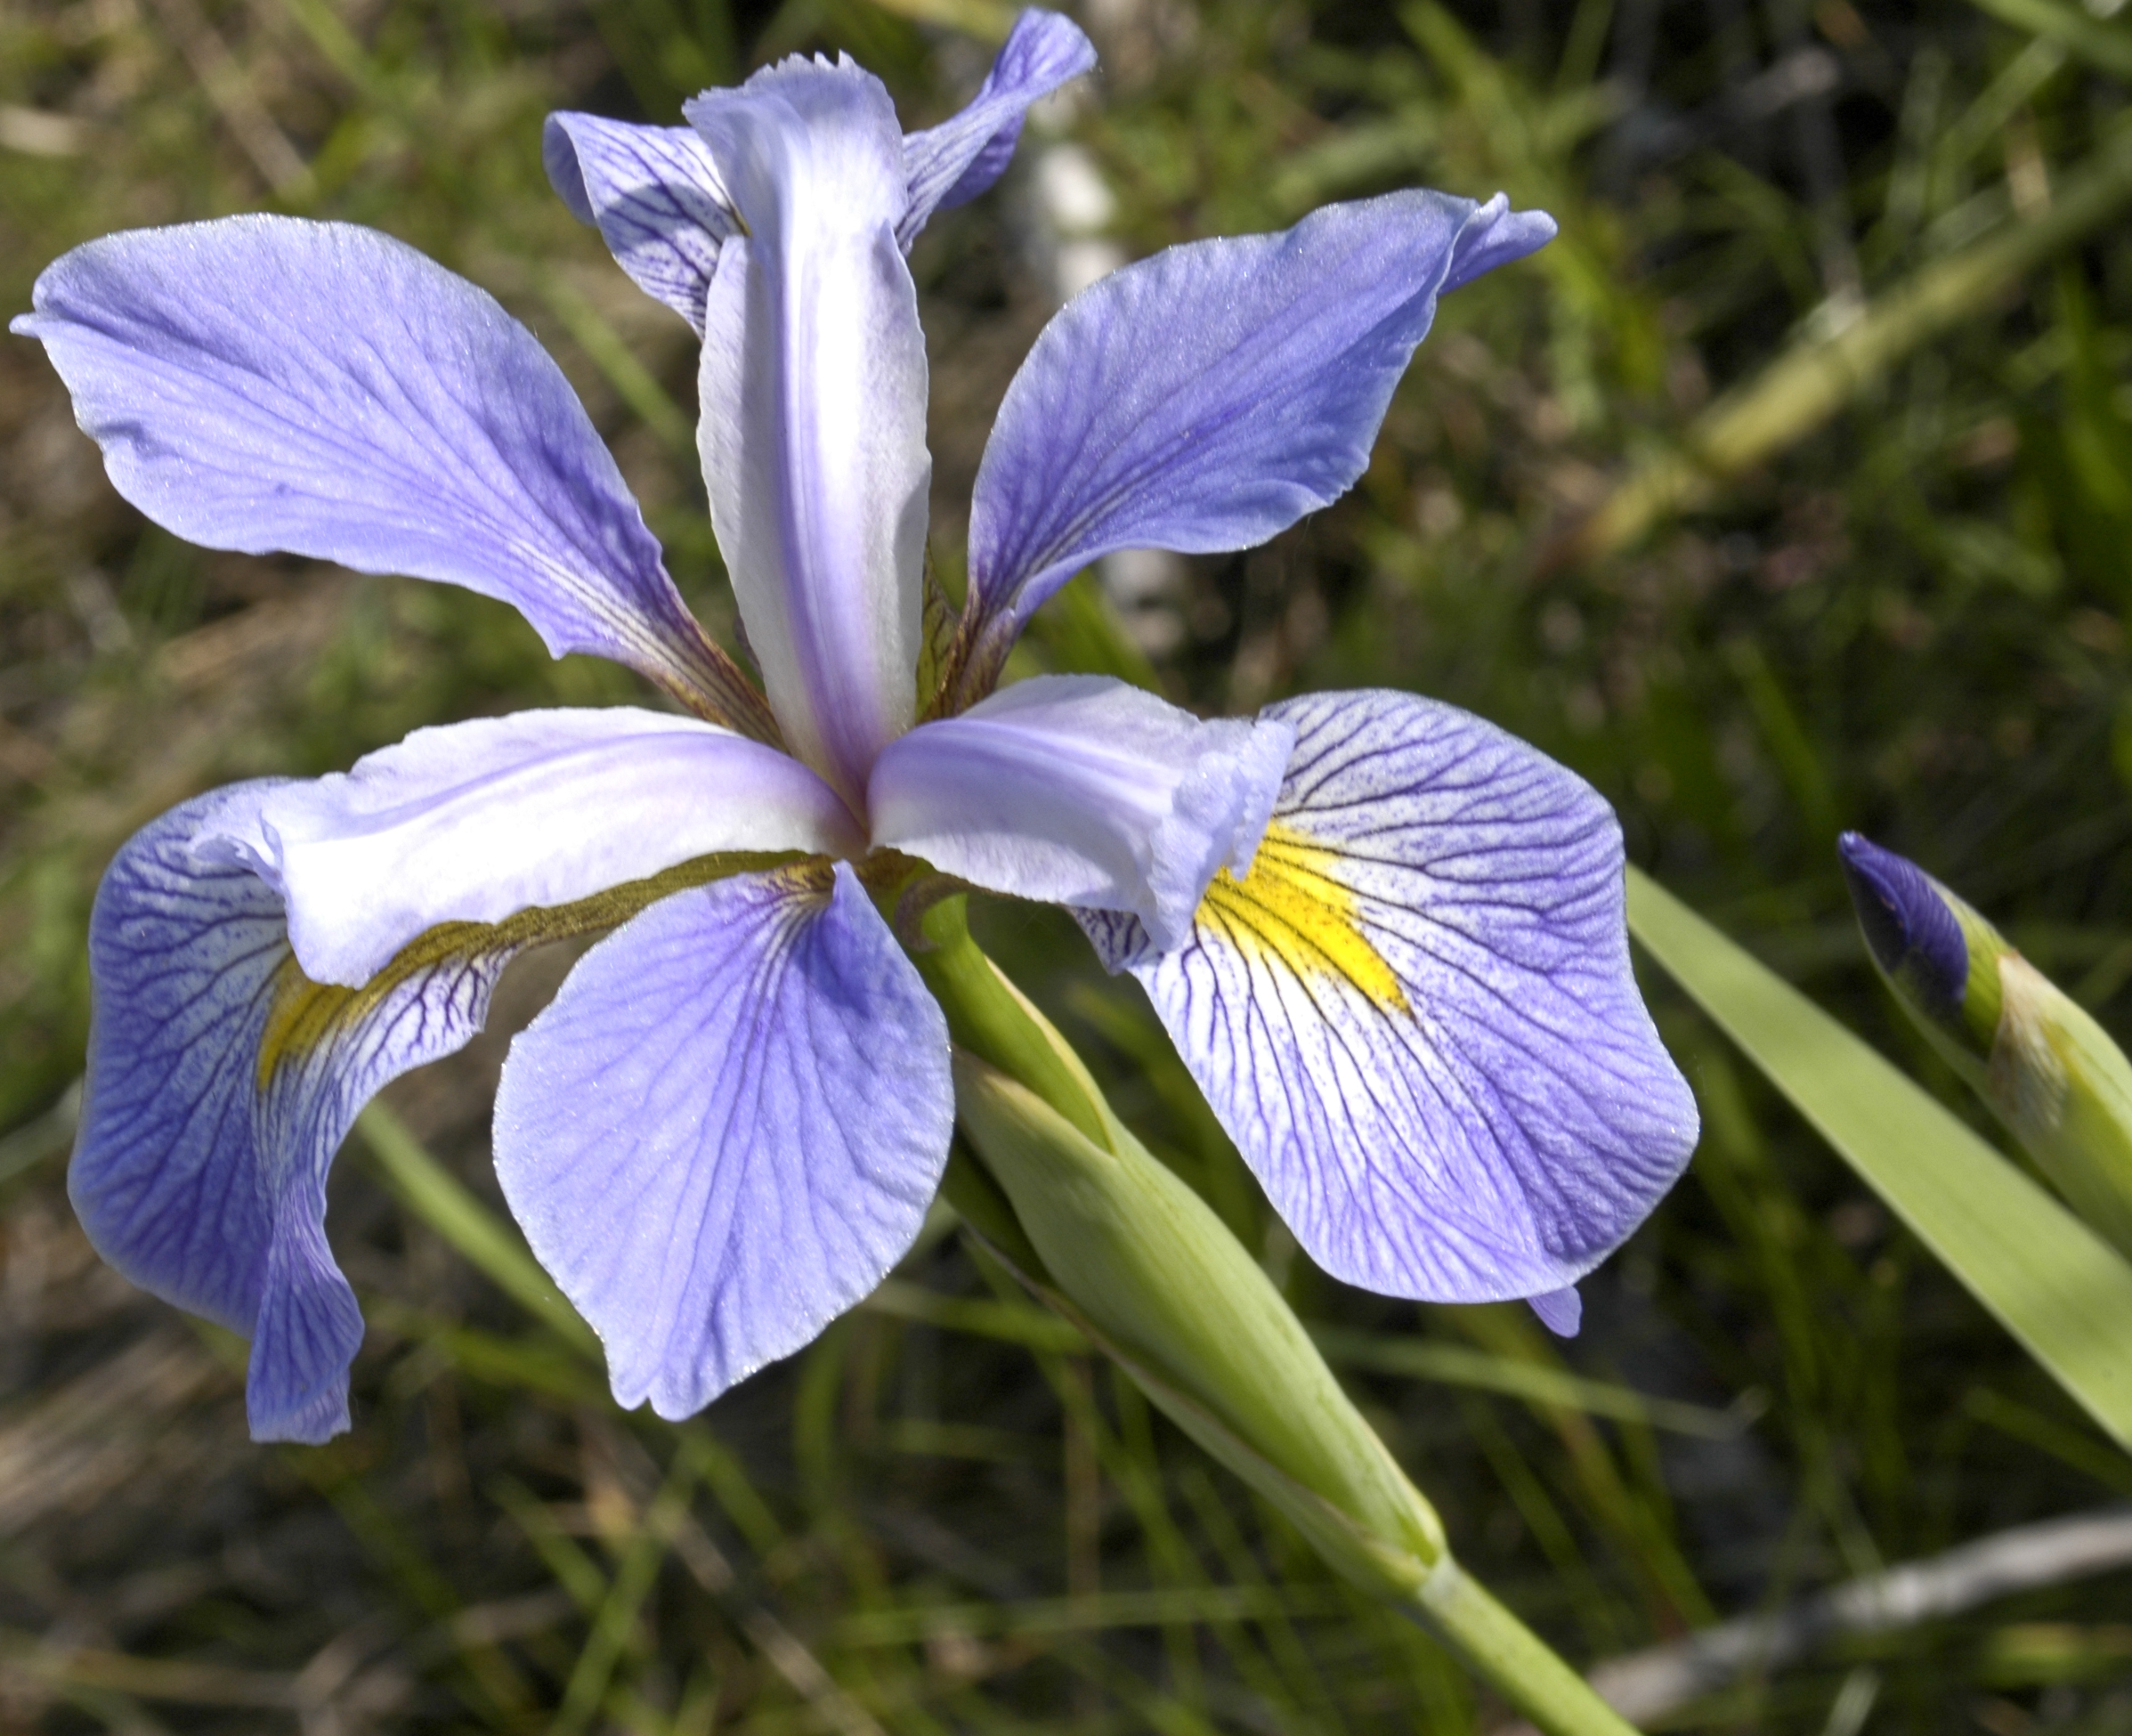

In [19]:
# The Iris Virginica
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'
Image(url,width=300, height=300)

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data

**Use seaborn to get the iris data by using: iris = sns.load_dataset('iris') **

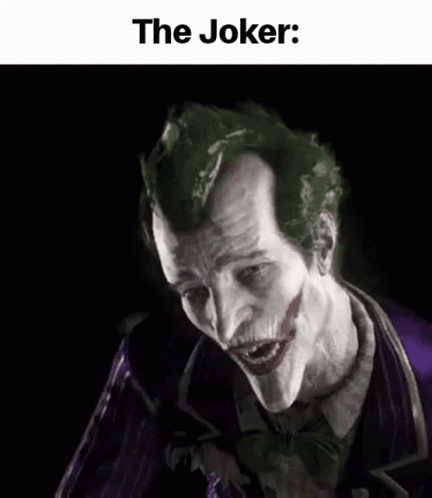

In [8]:
url = "https://c.tenor.com/X76me5C8XMUAAAAC/the-joker.gif"
Image(url)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

In [26]:
irisFeatures = pd.DataFrame(data = iris["data"], columns = iris["feature_names"])

In [23]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
y = pd.DataFrame(iris["target"], columns = ["target"])
y

target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]

In [40]:
dfMain = pd.concat([irisFeatures, y], axis = 1)

Let's visualize the data and get you started!

## Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

**Import some libraries you think you'll need.**

In [42]:
dfMain

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2       0
1                  4.9               3.0  ...               0.2       0
2                  4.7               3.2  ...               0.2       0
3                  4.6               3.1  ...               0.2       0
4                  5.0               3.6  ...               0.2       0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3       2
146                6.3               2.5  ...               1.9       2
147                6.5               3.0  ...               2.0       2
148                6.2               3.4  ...               2.3       2
149                5.9               3.0  ...               1.8       2

[150 rows x 5 columns]

** Create a pairplot of the data set. Which flower species seems to be the most separable?**

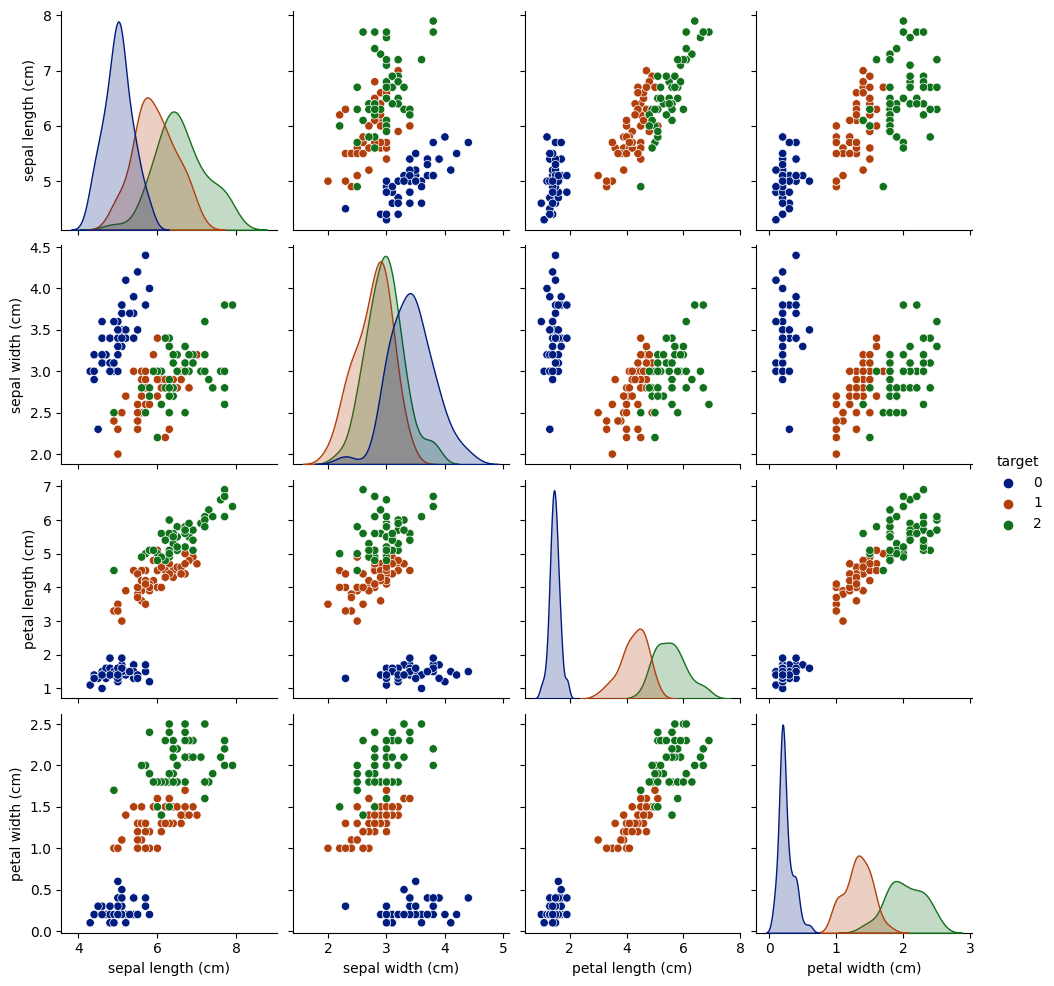

In [48]:
sns.pairplot(data = dfMain, hue = "target", palette = "dark")

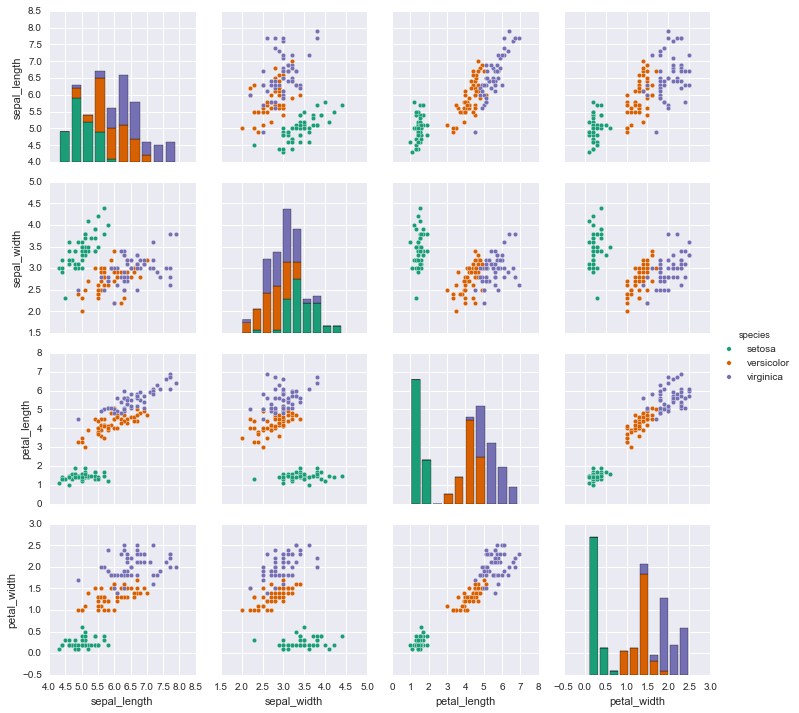

**Create a kde plot of sepal_length versus sepal width for setosa species of flower.**

In [50]:
dfMain

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2       0
1                  4.9               3.0  ...               0.2       0
2                  4.7               3.2  ...               0.2       0
3                  4.6               3.1  ...               0.2       0
4                  5.0               3.6  ...               0.2       0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3       2
146                6.3               2.5  ...               1.9       2
147                6.5               3.0  ...               2.0       2
148                6.2               3.4  ...               2.3       2
149                5.9               3.0  ...               1.8       2

[150 rows x 5 columns]

<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

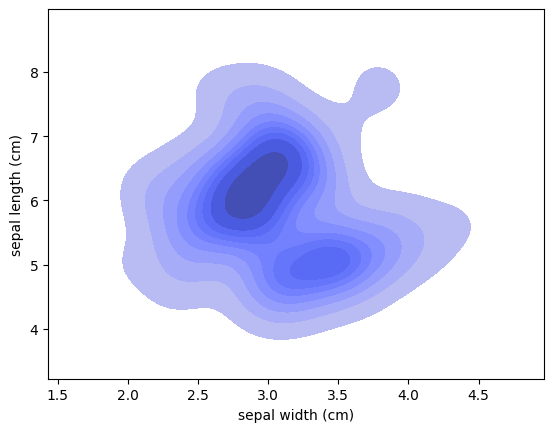

In [71]:
sns.color_palette("vlag")
sns.kdeplot(x = dfMain["sepal width (cm)"], y = dfMain["sepal length (cm)"], fill = True, palette = "vlag")

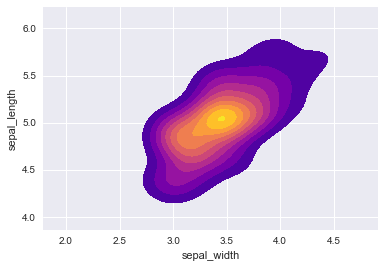

# Train Test Split

** Split your data into a training set and a testing set.**

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
xTrain, xTest, yTrain, yTest = train_test_split(irisFeatures, y, test_size = 0.3)

# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [74]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xTrain, yTrain)

/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [76]:
pred = svm.predict(xTest)

from sklearn.metrics import confusion_matrix, classification_report

In [77]:
print(confusion_matrix(yTest, pred))

[[22  0  0]
 [ 0 10  0]
 [ 0  2 11]]


In [78]:
print(classification_report(yTest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.83      1.00      0.91        10
           2       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.96      0.96      0.96        45



[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      0.93      0.96        14
  virginica       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45



Wow! You should have noticed that your model was pretty good! Let's see if we can tune the parameters to try to get even better (unlikely, and you probably would be satisfied with these results in real like because the data set is quite small, but I just want you to practice using GridSearch.

## Gridsearch Practice

** Import GridsearchCV from SciKit Learn.**

In [85]:
from sklearn.model_selection import GridSearchCV
paramGrid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "gamma" : [1, 0.1, 0.01, 0.001, 0.002, 0.003]}

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

** Create a GridSearchCV object and fit it to the training data.**

In [86]:
grid = GridSearchCV(SVC(), paramGrid, verbose = 3)

** Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve?**

In [87]:
grid.fit(xTrain, yTrain)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END ..................C=0.001, gamma=1;, score=0.381 total time=   0.0s
[CV 2/5] END ..................C=0.001, gamma=1;, score=0.381 total time=   0.0s
[CV 3/5] END ..................C=0.001, gamma=1;, score=0.381 total time=   0.0s
[CV 4/5] END ..................C=0.001, gamma=1;, score=0.381 total time=   0.0s
[CV 5/5] END ..................C=0.001, gamma=1;, score=0.381 total time=   0.0s
[CV 1/5] END ................C=0.001, gamma=0.1;, score=0.381 total time=   0.0s
[CV 2/5] END ................C=0.001, gamma=0.1;, score=0.381 total time=   0.0s
[CV 3/5] END ................C=0.001, gamma=0.1;, score=0.381 total time=   0.0s
[CV 4/5] END ................C=0.001, gamma=0.1;, score=0.381 total time=   0.0s
[CV 5/5] END ................C=0.001, gamma=0.1;, score=0.381 total time=   0.0s
[CV 1/5] END ...............C=0.001, gamma=0.01;, score=0.381 total time=   0.0s
[CV 2/5] END ...............C=0.001, gamma=0.01

/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

[CV 4/5] END .................C=0.01, gamma=0.1;, score=0.381 total time=   0.0s
[CV 5/5] END .................C=0.01, gamma=0.1;, score=0.381 total time=   0.0s
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.381 total time=   0.0s
[CV 2/5] END ................C=0.01, gamma=0.01;, score=0.381 total time=   0.0s
[CV 3/5] END ................C=0.01, gamma=0.01;, score=0.381 total time=   0.0s
[CV 4/5] END ................C=0.01, gamma=0.01;, score=0.381 total time=   0.0s
[CV 5/5] END ................C=0.01, gamma=0.01;, score=0.381 total time=   0.0s
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.381 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=0.001;, score=0.381 total time=   0.0s
[CV 3/5] END ...............C=0.01, gamma=0.001;, score=0.381 total time=   0.0s
[CV 4/5] END ...............C=0.01, gamma=0.001;, score=0.381 total time=   0.0s
[CV 5/5] END ...............C=0.01, gamma=0.001;, score=0.381 total time=   0.0s
[CV 1/5] END ...............

/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.381 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.381 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.381 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.002;, score=0.381 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.002;, score=0.381 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.002;, score=0.381 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.002;, score=0.381 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.002;, score=0.381 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.003;, score=0.381 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.003;, score=0.381 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.003;, score=0.381 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.003;, score=0.381 total time=   0.0s
[CV 5/5] END ...............

/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

[CV 3/5] END .....................C=10, gamma=1;, score=1.000 total time=   0.0s
[CV 4/5] END .....................C=10, gamma=1;, score=0.952 total time=   0.0s
[CV 5/5] END .....................C=10, gamma=1;, score=0.952 total time=   0.0s
[CV 1/5] END ...................C=10, gamma=0.1;, score=0.952 total time=   0.0s
[CV 2/5] END ...................C=10, gamma=0.1;, score=0.905 total time=   0.0s
[CV 3/5] END ...................C=10, gamma=0.1;, score=1.000 total time=   0.0s
[CV 4/5] END ...................C=10, gamma=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END ...................C=10, gamma=0.1;, score=0.952 total time=   0.0s
[CV 1/5] END ..................C=10, gamma=0.01;, score=0.905 total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.01;, score=0.905 total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.01;, score=1.000 total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.01;, score=0.952 total time=   0.0s
[CV 5/5] END ...............

/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

[CV 3/5] END ................C=100, gamma=0.003;, score=1.000 total time=   0.0s
[CV 4/5] END ................C=100, gamma=0.003;, score=1.000 total time=   0.0s
[CV 5/5] END ................C=100, gamma=0.003;, score=1.000 total time=   0.0s
[CV 1/5] END ...................C=1000, gamma=1;, score=0.905 total time=   0.0s
[CV 2/5] END ...................C=1000, gamma=1;, score=0.905 total time=   0.0s
[CV 3/5] END ...................C=1000, gamma=1;, score=1.000 total time=   0.0s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.952 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.905 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.952 total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.905 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=1.000 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.905 total time=   0.0s
[CV 5/5] END ...............

/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.002, 0.003]},
             verbose=3)

In [88]:
grid.best_params_

{'C': 100, 'gamma': 0.003}

In [90]:
gridPred = grid.predict(xTest)

In [91]:
print(confusion_matrix(yTest, gridPred))

[[22  0  0]
 [ 0 10  0]
 [ 0  0 13]]


In [92]:
print(classification_report(yTest, gridPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      0.93      0.96        14
  virginica       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45



You should have done about the same or exactly the same, this makes sense, there is basically just one point that is too noisey to grab, which makes sense, we don't want to have an overfit model that would be able to grab that.

## Great Job!